MLP 활용 분류, 정상/피싱 사이트 분류

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「범주형 변수 탐색」
* 🥇Session 3 - 「MLP 활용 피싱 사이트 예측」

In [1]:
# ▶ status 및 url 빼고 모든 컬럼 존재
url_headers = [    'length_url',                                  
                   'length_hostname',
                   'ip',
                   'nb_dots',
                   'nb_hyphens',
                   'nb_at',
                   'nb_qm',
                   'nb_and',
                   'nb_or',
                   'nb_eq',                  
                   'nb_underscore',
                   'nb_tilde',
                   'nb_percent',
                   'nb_slash',
                   'nb_star',
                   'nb_colon',
                   'nb_comma',
                   'nb_semicolumn',
                   'nb_dollar',
                   'nb_space',
                   'nb_www',
                   'nb_com',
                   'nb_dslash',
                   'http_in_path',
                   'https_token',
                   'ratio_digits_url',
                   'ratio_digits_host',
                   'punycode',
                   'port',
                   'tld_in_path',
                   'tld_in_subdomain',
                   'abnormal_subdomain',
                   'nb_subdomains',
                   'prefix_suffix',
                   'random_domain',
                   'shortening_service',
                   'path_extension',        
                   'nb_redirection',
                   'nb_external_redirection',
                   'length_words_raw',
                   'char_repeat',
                   'shortest_words_raw',
                   'shortest_word_host',
                   'shortest_word_path',
                   'longest_words_raw',
                   'longest_word_host',
                   'longest_word_path',
                   'avg_words_raw',
                   'avg_word_host',
                   'avg_word_path',
                   'phish_hints',
                   'domain_in_brand',
                   'brand_in_subdomain',
                   'brand_in_path',
                   'suspecious_tld',
                   'statistical_report'

                ]


ctn_headers = [
                   'nb_hyperlinks', 
                   'ratio_intHyperlinks',
                   'ratio_extHyperlinks', 
                   'ratio_nullHyperlinks',
                   'nb_extCSS',
                   'ratio_intRedirection',
                   'ratio_extRedirection',
                   'ratio_intErrors',
                   'ratio_extErrors',
                   'login_form', 
                   'external_favicon',
                   'links_in_tags',
                   'submit_email', 
                   'ratio_intMedia',
                   'ratio_extMedia',
                   'sfh',
                   'iframe',
                   'popup_window',
                   'safe_anchor', 
                   'onmouseover',
                   'right_clic',
                   'empty_title', 
                   'domain_in_title',
                   'domain_with_copyright',                   
                ]


tpt_headers = [
                   'whois_registered_domain',
                   'domain_registration_length',
                   'domain_age', 
                   'web_traffic',
                   'dns_record',
                   'google_index',
                   'page_rank'

                ]

headers = url_headers + ctn_headers + tpt_headers
len(headers)

87

In [2]:
# ▶ pd.setoption
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)  

# ▶ Data read
df = pd.read_csv("dataset_phishing.csv")
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate



## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 피싱(phishing) 사이트로 인한 개인정보 유출
```  

> **기대효과**

```
▶ 피싱(phishing) 사이트 검출 및 폐쇄 조치로 인한 피해 감소
```

> **해결방안**

```
▶ 정상(legitimate)/피싱(phishing) 사이트 예측 모델링을 통한 검출
▶ Session 1 🥉
 - Data 전처리 및 EDA
▶ Session 2 🥈
 - 범주형 변수와 타겟 변수와 관계가 있는 변수를 탐색
▶ Session 3 🥇
 - DL 알고리즘을 활용하여 피싱(phishing) 사이트 모델링
```

> **성과측정**  

```
▶ 모델 운용 전/후 개인정보 유출 건수 측정
```

> **현업적용**  

```
▶ 매 월 피싱(phishing) 사이트 검출 및 폐쇄 
```

> **주요 코드 미리 살펴보기**  

```
▶ Session 1 → df.isnull().sum(), value_counts(normalize=True), df.corr()
▶ Session 2 → df.groupby().agg(), df.sort_values, concat()
▶ Session 3 → preprocessing.MinMaxScaler(), torch.from_numpy(), classification_report()
```

## **🥉Session 1**  
**┗ Data 전처리 및 EDA**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인 

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

In [34]:
# ▶ Data 형태 확인
# ▶ 11430 row, 89 col로 구성됨
print('df', df.shape)

df (11430, 89)


In [5]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [6]:
# ▶ Null 값 확인
print(df.isnull().sum().sum())

0


In [7]:
# ▶ Outlier 확인
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000

In [8]:
# ▶ Target ratio(%) 확인
pd.DataFrame({"count":df['status'].value_counts(),"ratio(%)":df['status'].value_counts(normalize=True)*100})

,count,ratio(%)
legitimate,5715,50.0
phishing,5715,50.0


### · 상관관계 분석 
---
* 데이터간 상관관계 분석 (feat.다중공선성)

In [10]:
# ▶ 카테고리컬 변수 제외
list_of_df = [] 

for var in df.iloc[:,1:].columns :  
  loop_df = pd.DataFrame({'var':[var], 'ncnt':[df[var].nunique()]})
  list_of_df.append(loop_df)

df_accum_start = pd.concat(list_of_df).reset_index(drop=True) 

In [11]:
df_accum_start.head()

,var,ncnt
0,length_url,324
1,length_hostname,83
2,ip,2
3,nb_dots,19
4,nb_hyphens,27


In [12]:
# ▶ 숫자로 이루어져 있지만, 카테고리컬(범주형) 변수와 다를게 없음
df['ip'].value_counts()

0    9709
1    1721
Name: ip, dtype: int64

In [13]:
# ▶ Unique한 Value가 4 초과인 연속형 변수에 대해서만 num_col로 정의
num_col = df_accum_start[df_accum_start['ncnt'] > 4]['var'].values
cat_col = df_accum_start[~df_accum_start['var'].isin(num_col)]['var'].values
print("num_col:", len(num_col), "cat_col:",len(cat_col))

num_col: 46 cat_col: 42


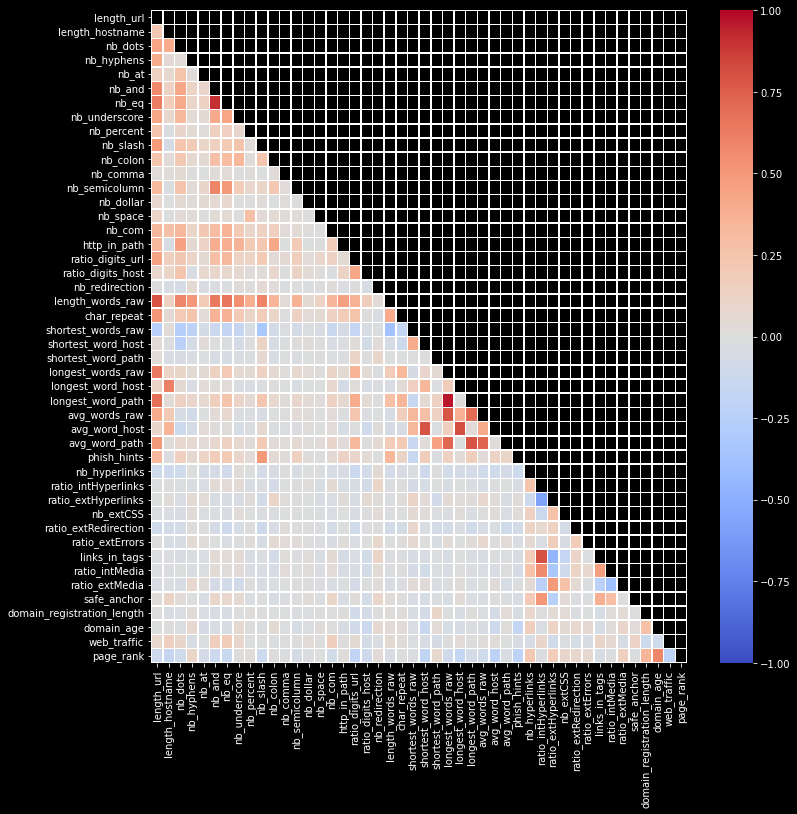

In [ ]:
# ▶ 변수의 모든 조합, 상관계수 표현
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

fig = plt.figure(figsize=(12,12))
df_num = df[num_col].corr()
sns.heatmap(df_num, vmin = -1, vmax = +1, annot = False, cmap = 'coolwarm', linewidths=.5, mask=np.triu(df_num.corr()));

## **🥈Session 2**  
**┗ 범주형 변수 탐색**  
---
* 범주형 변수를 탐색
* 의미있는 범주형 변수를 탐색하는 과정

### · 범주형 변수와 타겟 관계 탐색
---
* 범주형 변수와 타겟 변수와 관계가 있는 변수를 탐색

In [14]:
df[cat_col].head()

,ip,nb_qm,nb_or,nb_tilde,nb_star,nb_www,nb_dslash,https_token,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_external_redirection,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,ratio_nullHyperlinks,ratio_intRedirection,ratio_intErrors,login_form,external_favicon,submit_email,sfh,iframe,popup_window,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,dns_record,google_index,status
0,0,0,0,0,0,1,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,legitimate
1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,phishing
2,1,1,0,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,phishing
3,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,legitimate
4,0,0,0,0,0,1,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,legitimate


In [16]:
# ▶ 변수 별 Target ratio를 확인하기 위해 Target 변수를 숫자(1 or 0)으로 변경, 1(phishing), 0(legitimate)
import numpy as np
df_cat = df[cat_col]
df_cat['status'] = np.where(df_cat['status'] == 'phishing', 1, 0).astype('int')
df_cat['status'].value_counts()

0    5715
1    5715
Name: status, dtype: int64

In [18]:
# ▶ groupby, agg 함수를 통해 카테고리별 카운트 및 피싱(phishing)의 합계를 구함
temp = df_cat.groupby('ip')['status'].agg(['count', 'sum'])
temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
print(temp)

    count   sum  ratio
ip                    
0    9709  4197  43.23
1    1721  1518  88.20


In [20]:
# ▶ for문 활용, 범주형 변수 모두 출력
for var in df_cat.columns :
  temp = df_cat.groupby(var)['status'].agg(['count', 'sum'])
  temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
  print(temp)
  print("---------------------------")

    count   sum  ratio
ip                    
0    9709  4197  43.23
1    1721  1518  88.20
---------------------------
       count   sum   ratio
nb_qm                     
0       9875  4353   44.08
1       1503  1311   87.23
2         45    44   97.78
3          7     7  100.00
---------------------------
       count   sum  ratio
nb_or                    
0      11430  5715   50.0
---------------------------
          count   sum  ratio
nb_tilde                    
0         11354  5663  49.88
1            76    52  68.42
---------------------------
         count   sum   ratio
nb_star                     
0        11422  5707   49.96
1            8     8  100.00
---------------------------
        count   sum  ratio
nb_www                    
0        6330  4447  70.25
1        5074  1245  24.54
2          26    23  88.46
---------------------------
           count   sum  ratio
nb_dslash                    
0          11355  5644  49.70
1             75    71  94.67
-------------

### · 분별력 있는 변수 Selection
---
* 범주형 변수 중 분류(Classification)에 의미 있는 변수 탐색
* Lift(향상도) - 수행하지 않았을 것(baseline) 대비 수행한 것에 대한 효율을 측정
* 모델을 사용하지 않는 경우, 50% 확률로 피싱(phishing) 사이트를 구분할 수 있음(base line)

In [21]:
# ▶ 기존 Target ratio 계산 
temp = df_cat.groupby('ip')['status'].agg(['count', 'sum'])
temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
print(temp)

    count   sum  ratio
ip                    
0    9709  4197  43.23
1    1721  1518  88.20


In [22]:
# ▶ baseline인 50%를 나누어, lift(향상도)를 계산
temp = df_cat.groupby('ip')['status'].agg(['count', 'sum'])
temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
temp['lift'] = round(temp['ratio'] / 50,2)
print(temp)

    count   sum  ratio  lift
ip                          
0    9709  4197  43.23  0.86
1    1721  1518  88.20  1.76


In [23]:
# ▶ for문 활용, 범주형 변수와 max_lift 출력
# ▶ lift 1 이상이여서 분별력 있는 변수일 가능성이 높음
for var in df_cat.columns :
  temp = df_cat.groupby(var)['status'].agg(['count', 'sum'])
  temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
  temp['lift'] = round(temp['ratio'] / 50,2)
  print("var: {} / max_lift: {}".format(var, temp['lift'].max()) )
  print("---------------------------")

var: ip / max_lift: 1.76
---------------------------
var: nb_qm / max_lift: 2.0
---------------------------
var: nb_or / max_lift: 1.0
---------------------------
var: nb_tilde / max_lift: 1.37
---------------------------
var: nb_star / max_lift: 2.0
---------------------------
var: nb_www / max_lift: 1.77
---------------------------
var: nb_dslash / max_lift: 1.89
---------------------------
var: https_token / max_lift: 1.09
---------------------------
var: punycode / max_lift: 2.0
---------------------------
var: port / max_lift: 1.19
---------------------------
var: tld_in_path / max_lift: 1.3
---------------------------
var: tld_in_subdomain / max_lift: 1.91
---------------------------
var: abnormal_subdomain / max_lift: 1.86
---------------------------
var: nb_subdomains / max_lift: 1.28
---------------------------
var: prefix_suffix / max_lift: 1.43
---------------------------
var: random_domain / max_lift: 1.07
---------------------------
var: shortening_service / max_lift: 1.28

In [24]:
# ▶ df로 변경
list_of_df = [] 

for var in df_cat.columns :
  temp = df_cat.groupby(var)['status'].agg(['count', 'sum'])
  temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
  temp['lift'] = round(temp['ratio'] / 50,2)
  loop_df = pd.DataFrame({'var':[var], 'max_lift':[temp['lift'].max()]})
  list_of_df.append(loop_df)

df_accum_start = pd.concat(list_of_df).reset_index(drop=True)
df_accum_start[df_accum_start['max_lift'] > 1].sort_values(by=['max_lift'], ascending=False).head(10)

,var,max_lift
41,status,2.00
1,nb_qm,2.00
4,nb_star,2.00
8,punycode,2.00
20,brand_in_subdomain,2.00
18,nb_external_redirection,2.00
21,brand_in_path,1.93
11,tld_in_subdomain,1.91
6,nb_dslash,1.89
12,abnormal_subdomain,1.86


In [33]:
# ▶ lift는 높지만, 차지하고 있는 비중이 낮으므로 크게 의미 없음
# ▶ 차지하고 있는 비중도 같이 고려해야 분별력 있는 변수를 선정할 수 있음
lift_list = ['nb_qm', 'nb_star', 'punycode', 'brand_in_subdomain','nb_external_redirection']

for var in  lift_list :
  temp = df_cat.groupby(var)['status'].agg(['count', 'sum'])
  temp['ratio_t'] = round((temp['sum'] / temp['count'])*100,2)
  temp['lift'] = round(temp['ratio_t'] / 50,2)
  temp['ratio_2'] = round((temp['count'] / len(df))*100,2)
  print(temp)
  print("---------------------------")

       count   sum  ratio_t  lift  ratio_2
nb_qm                                     
0       9875  4353    44.08  0.88    86.40
1       1503  1311    87.23  1.74    13.15
2         45    44    97.78  1.96     0.39
3          7     7   100.00  2.00     0.06
---------------------------
         count   sum  ratio_t  lift  ratio_2
nb_star                                     
0        11422  5707    49.96   1.0    99.93
1            8     8   100.00   2.0     0.07
---------------------------
          count   sum  ratio_t  lift  ratio_2
punycode                                     
0         11426  5711    49.98   1.0    99.97
1             4     4   100.00   2.0     0.03
---------------------------
                    count   sum  ratio_t  lift  ratio_2
brand_in_subdomain                                     
0                   11383  5668    49.79   1.0    99.59
1                      47    47   100.00   2.0     0.41
---------------------------
                         count   sum  rati

In [29]:
# ▶ lift는 높지만, 차지하고 있는 비중이 낮으므로 크게 의미 없음
# ▶ 차지하고 있는 비중도 같이 고려해야 분별력 있는 변수를 선정할 수 있음
lift_list = ['nb_qm', 'nb_star', 'punycode', 'brand_in_subdomain','nb_external_redirection']

for var in  lift_list :
  temp = df_cat.groupby(var)['status'].agg(['count', 'sum'])
  temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
  temp['lift'] = round(temp['ratio'] / 50,2)
  print(temp)
  print("---------------------------")

       count   sum  T_ratio  ratio_2  lift
nb_qm                                     
0       9875  4353    44.08    38.08  0.88
1       1503  1311    87.23    11.47  1.74
2         45    44    97.78     0.38  1.96
3          7     7   100.00     0.06  2.00
---------------------------
         count   sum  T_ratio  ratio_2  lift
nb_star                                     
0        11422  5707    49.96    49.93   1.0
1            8     8   100.00     0.07   2.0
---------------------------
          count   sum  T_ratio  ratio_2  lift
punycode                                     
0         11426  5711    49.98    49.97   1.0
1             4     4   100.00     0.03   2.0
---------------------------
                    count   sum  T_ratio  ratio_2  lift
brand_in_subdomain                                     
0                   11383  5668    49.79    49.59   1.0
1                      47    47   100.00     0.41   2.0
---------------------------
                         count   sum  T_ra

## **🥇Session 3**  
**┗ MLP 활용 피싱 사이트 예측**  
---

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [38]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
# ▶ target 데이터를 숫자(1,0) 으로 변경
# ▶ 기존 'status' col은 삭제
import numpy as np
df['target'] = np.where(df['status'] == 'phishing', 1, 0).astype('int')
df.drop('status',axis = 1, inplace=True)
df[['url', 'target']].head()

,url,target
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0


In [50]:
# ▶ 모델링을 학습하기 위한 Feature(X)와 Target(Y) 데이터를 구분하는 단계
from sklearn.model_selection import train_test_split

X=df.drop(['url', 'target'], axis=1)
Y=df['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(8001, 87)
(8001,)
(3429, 87)
(3429,)


### · Tensor 변환 
---
* 데이터 셋을 Pytorch Tensor 데이터 셋으로 변환
* Tensor : 다차원의 배열을 통칭

In [51]:
from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler

# ▶ Pytorch libraries import
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# ▶ 딥러닝에서는 변수들의 합성곱을 진행하기 때문에, 오해가 없도록(※ 값 자체가 높은 Feature의 과영향 방지) 스케일링 선작업을 진행함
scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train.values)
x_test =  scaler.transform(x_test.values)

# ▶ torch.from_numpy 함수를 통해 데이터를 torch에서 인식할 수 있는 tesnor 형태로 변환
# ▶ ravel() : 다차원 배열을 1차원에 배열로 평탄화
x_tensor =  torch.from_numpy(x_train).float()
y_tensor =  torch.from_numpy(y_train.values.ravel()).float()
xtest_tensor =  torch.from_numpy(x_test).float()
ytest_tensor =  torch.from_numpy(y_test.values.ravel()).float()

print("[Train set Tensors] \n")
print(x_tensor)
print(y_tensor)
print("\n[Test set Tensors] \n")
print(xtest_tensor)
print(ytest_tensor)

[Train set Tensors] 

tensor([[0.1780, 0.1048, 1.0000,  ..., 0.0000, 1.0000, 0.3000],
        [0.0411, 0.0429, 1.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.0086, 0.0619, 0.0000,  ..., 0.0000, 0.0000, 0.5000],
        ...,
        [0.0129, 0.0333, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.0055, 0.0381, 0.0000,  ..., 0.0000, 0.0000, 0.5000],
        [0.0086, 0.0429, 0.0000,  ..., 0.0000, 1.0000, 0.4000]])
tensor([1., 1., 0.,  ..., 0., 0., 1.])

[Test set Tensors] 

tensor([[0.0178, 0.0619, 0.0000,  ..., 0.0000, 0.0000, 0.5000],
        [0.0086, 0.0619, 0.0000,  ..., 0.0000, 0.0000, 0.2000],
        [0.0270, 0.1000, 0.0000,  ..., 0.0000, 1.0000, 0.2000],
        ...,
        [0.0528, 0.0619, 0.0000,  ..., 0.0000, 1.0000, 0.2000],
        [0.0141, 0.0571, 0.0000,  ..., 0.0000, 1.0000, 1.0000],
        [0.0319, 0.0810, 0.0000,  ..., 0.0000, 0.0000, 0.5000]])
tensor([0., 0., 1.,  ..., 1., 0., 0.])


### · Dataset 및 DataLoader 생성
---
* DL을 위한 PyTorch Dataset 및 DataLoader 생성

<img src = "https://drive.google.com/uc?id=1EryHk56mjQA6CCQdlnvXZug2OOz4rnDo" width="500" height="200">

In [52]:
# ▶ 배치 사이즈 선정 (batch, iteration, epoch 개념 숙지)
# 1) batch : 한 번에 학습시킬 데이터의 양
# 2) epoch : 전체 학습 셋이 신경망을 통과한 횟수
# 3) iteration : 1-epoch를 마치는데 필요한 batch 개수

bs = 64
# ▶ unsqueeze(1) : 평탄화 tensor에 1차원을 추가, 차원이 없는 Tensor에 1차원이 추가됨
y_tensor = y_tensor.unsqueeze(1)
train_ds = TensorDataset(x_tensor, y_tensor)

# ▶ DataLoader : batch_size 만큼 데이터를 이동시켜주는 기능, iteration을 효율적으로 빠르게 하기 위함 
train_dl = DataLoader(train_ds, batch_size=bs, drop_last=True)

# ▶ Test set에도 동일하게 적용
ytest_tensor = ytest_tensor.unsqueeze(1)
test_ds = TensorDataset(xtest_tensor, ytest_tensor)
test_loader = DataLoader(test_ds, batch_size=32)

### · NN(Neural Network, 신경망) 설계
---
* 딥러닝 모델 학습을 위한 신경망 설계
* MLP(Multi Layer Perceptron) 구성

In [53]:
# ▶ input layer 정의, Feature의 개수 
n_input_dim = x_train.shape[1]

# ▶ hidden layer 및 output layer 정의, 최종 결과가 1,0인 binary clf 문제이므로 output layer는 1
n_hidden1 = 300  
n_hidden2 = 100
n_output =  1  

class PhishingModel(nn.Module):
    def __init__(self):
        super(PhishingModel, self).__init__()
        self.layer_1 = nn.Linear(n_input_dim, n_hidden1) 
        self.layer_2 = nn.Linear(n_hidden1, n_hidden2)
        self.layer_out = nn.Linear(n_hidden2, n_output) 
        
        # ▶ 사용할 활성화 함수(ReLU, Sigmoid) 및 추가 수행 Task 정의(Dropout, BatchNorm)
        # ▶ Drop out : 특정 node를 누락시며, 과적합을 방지 
        # ▶ BatchNorm : 데이터간 분포가 변경되는 risk를 방지하기 위해, 합성곱 후 normalization을 통해 분포를 조정
        self.relu = nn.ReLU()
        self.sigmoid =  nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(n_hidden1)
        self.batchnorm2 = nn.BatchNorm1d(n_hidden2)
        
    # ▶ forward 연산에, batch normalization
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.sigmoid(self.layer_out(x))
        
        return x
    
model = PhishingModel()
print(model)

PhishingModel(
  (layer_1): Linear(in_features=87, out_features=300, bias=True)
  (layer_2): Linear(in_features=300, out_features=100, bias=True)
  (layer_out): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [54]:
# ▶ 목적함수 정의
loss_func = nn.BCELoss()
# ▶ Optimizer 및 학습률 정의
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
epochs = 50

### · 모델 학습 및 평가
---
* 딥러닝 모델 학습 및 평가

In [55]:
# ▶ train mode로 전환
model.train()
train_loss = []

for epoch in range(epochs):
    running_loss =0.0 #매 에폭의 평균 loss 구하기 위해서 초기값 0으로 
    for xb, yb in train_dl:
        optimizer.zero_grad()         # ▶ Clearing all previous gradients, setting to zero 
        y_pred = model(xb)            # ▶ Forward Propagation
        loss = loss_func(y_pred, yb)  # ▶ Loss Computation
        loss.backward()               # ▶ Back Propagation (※ Forward를 설계하면, Backward는 자동 수행됨)
        optimizer.step()              # ▶ Updating the parameters 
        running_loss += loss.item()
    epoch_loss = running_loss/len(train_dl)
    print("Loss in epoch :"+str(epoch)+" is: "+str(epoch_loss)) 
    train_loss.append(epoch_loss)
print('Last iteration loss value: '+ str(loss.item()))

Loss in epoch :0 is: 0.203377486795187
Loss in epoch :1 is: 0.13082610695064067
Loss in epoch :2 is: 0.10474593786895275
Loss in epoch :3 is: 0.08057517766952514
Loss in epoch :4 is: 0.06278641398996115
Loss in epoch :5 is: 0.04915802888572216
Loss in epoch :6 is: 0.03926802509278059
Loss in epoch :7 is: 0.03287772057205439
Loss in epoch :8 is: 0.031445706196129325
Loss in epoch :9 is: 0.02439699972048402
Loss in epoch :10 is: 0.021845753317698835
Loss in epoch :11 is: 0.026854534113779666
Loss in epoch :12 is: 0.018829423340037465
Loss in epoch :13 is: 0.017018366240896286
Loss in epoch :14 is: 0.013631139364559203
Loss in epoch :15 is: 0.007760725062806159
Loss in epoch :16 is: 0.007165391341783106
Loss in epoch :17 is: 0.006128368625650182
Loss in epoch :18 is: 0.005671272424049675
Loss in epoch :19 is: 0.012220269079320133
Loss in epoch :20 is: 0.025933820333098993
Loss in epoch :21 is: 0.023502895442768932
Loss in epoch :22 is: 0.01462000205577351
Loss in epoch :23 is: 0.009496231

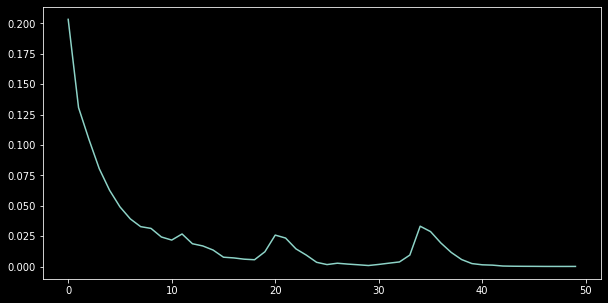

In [56]:
# ▶ train loss 출력 
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

plt.plot(train_loss)
plt.gcf().set_size_inches(10 ,5)
plt.show();

In [37]:
# ▶ test 데이터 예측
import itertools
y_pred_list = []
y_pred_proba = []

# ▶ 학습단계에, drop out 및 batchNorm 등을 비활성화 시킴
model.eval()

# ▶ torch.no_grad() : autograd engine을 비활성화 시켜서 메모리를 증가시켜주고 연산속도를 증가
with torch.no_grad():
    for xb_test,yb_test  in test_loader:
        y_test_pred = model(xb_test)

        # ▶ proba(예측 확률, 0.44 ..)
        # ▶ detach().numpy() : 
        y_pred_proba.append((y_test_pred.detach().numpy()))

        # ▶ binary(예측값, 1 or 0)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.detach().numpy())

# ▶ Takes arrays and makes them list of list for each batch        
# ▶ squeeze() : 차원축소
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
# ▶ flattens the lists in sequence
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))

# ▶ Proba
y_pred_proba_list = [a.squeeze().tolist() for a in y_pred_proba]
ytest_proba = list(itertools.chain.from_iterable(y_pred_proba_list))

In [57]:
print(ytest_pred[0:5])

[0.0, 0.0, 1.0, 1.0, 1.0]


In [58]:
print(ytest_proba[0:5])

[2.5589749839127762e-06, 1.1796812771081022e-07, 0.9989787340164185, 0.9999998807907104, 1.0]


In [59]:
# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1709
           1       0.96      0.95      0.95      1720

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429



In [60]:
# ▶ roc_auc_score 계산
from sklearn.metrics import roc_auc_score

roc_score_test = roc_auc_score(y_test, ytest_proba)
print("roc_score_test :", roc_score_test)

roc_score_test : 0.9846818144705866


In [61]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # ▶ 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ▶ ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # ▶ 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')
  
    # ▶ FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

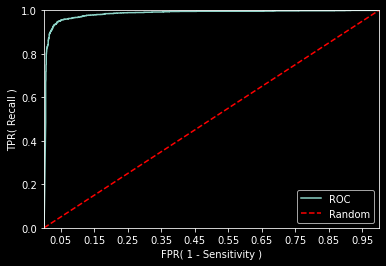

In [62]:
roc_curve_plot(y_test, ytest_proba)